# Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import math
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Import dataset

In [2]:
df_train = pd.read_csv('./train.csv')
df_test = pd.read_csv('./test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

In [5]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Exploratory Data Analysis

## Missing Data Visualization

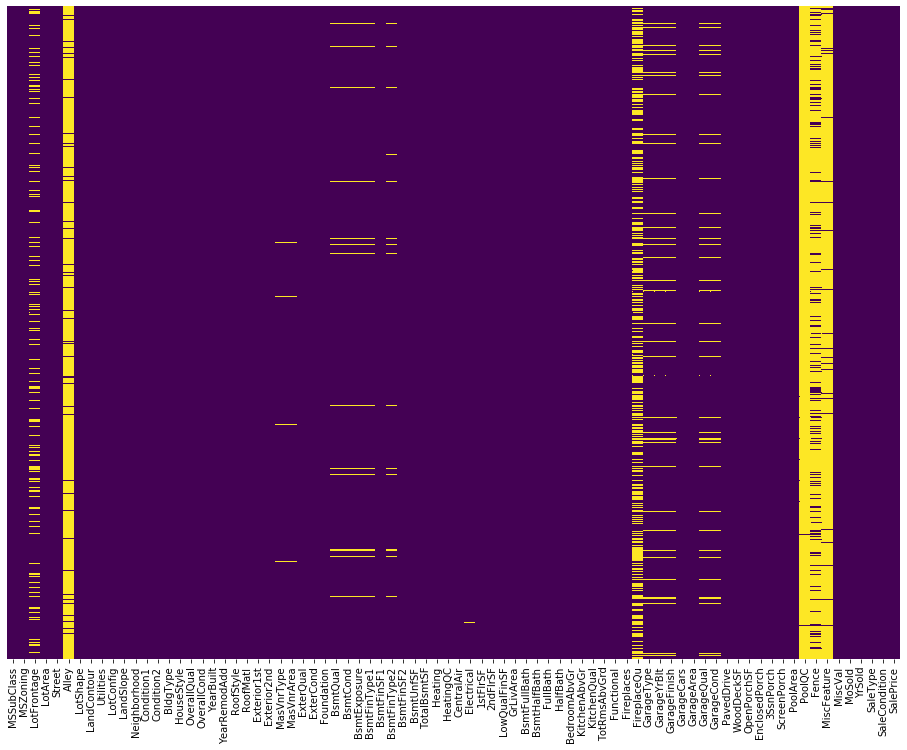

In [6]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train.isnull(), cbar=False, yticklabels=False, cmap='viridis')

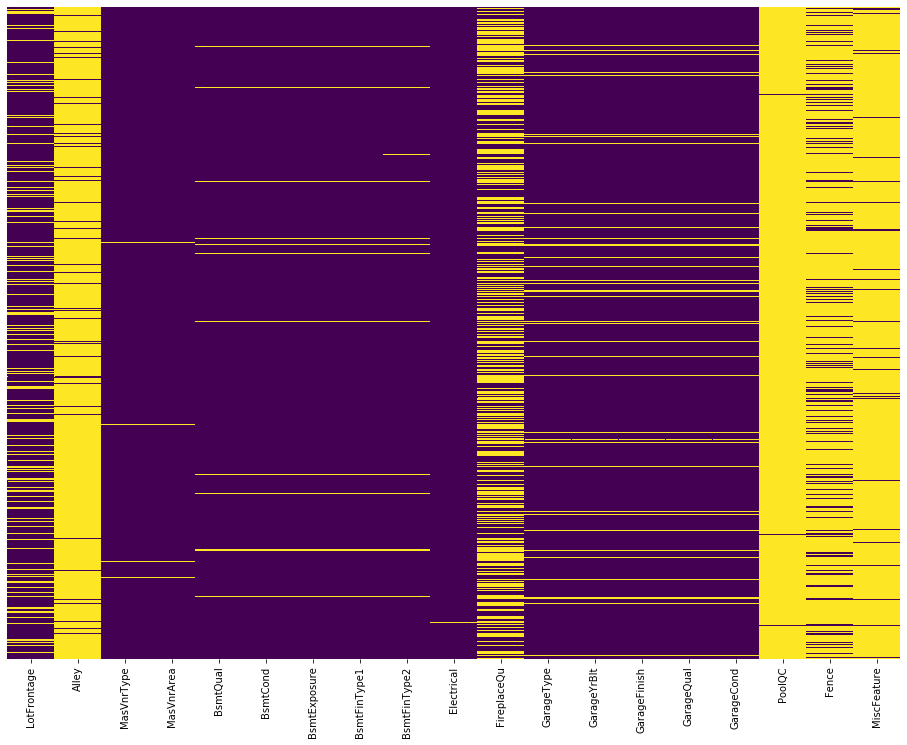

In [7]:
f, ax = plt.subplots(figsize=(16, 12))
col_missing_data = df_train.columns[df_train.isnull().sum() > 0].tolist()
sns.heatmap(df_train[col_missing_data].isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [8]:
for mis_col in col_missing_data:
    print(mis_col, df_train[mis_col].unique())

LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Alley [nan 'Grvl' 'Pave']
MasVnrType ['BrkFace' 'None' 'Stone' 'BrkCmn' nan]
MasVnrArea [1.960e+02 0.000e+00 1.620e+02 3.500e+02 1.860e+02 2.400e+02 2.860e+02
 3.060e+02 2.120e+02 1.800e+02 3.800e+02 2.810e+02 6.400e+02 2.000e+02
 2.460e+02 1.320e+02 6.500e+02 1.010e+02 4.120e+02 2.720e+02 4.560e+02
 1.031e+03 1.780e+02 5.730e+02 3.440e+02 2.870e+02 1.670e+02 1.115e+03
 4.000e+01 1.040e+02 5.760e+02 4.430e+02 4.680e+02 6

## Imputation Based on domain knowledge

In [9]:
## Data that can be filled based on Domain knowledge
Fill_with_none = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageType', 
             'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'FireplaceQu', 'MiscFeature']

In [10]:
for col in Fill_with_none:
    df_train[col] = df_train[col].apply(lambda x : '0' if str(x) == 'nan' else x)

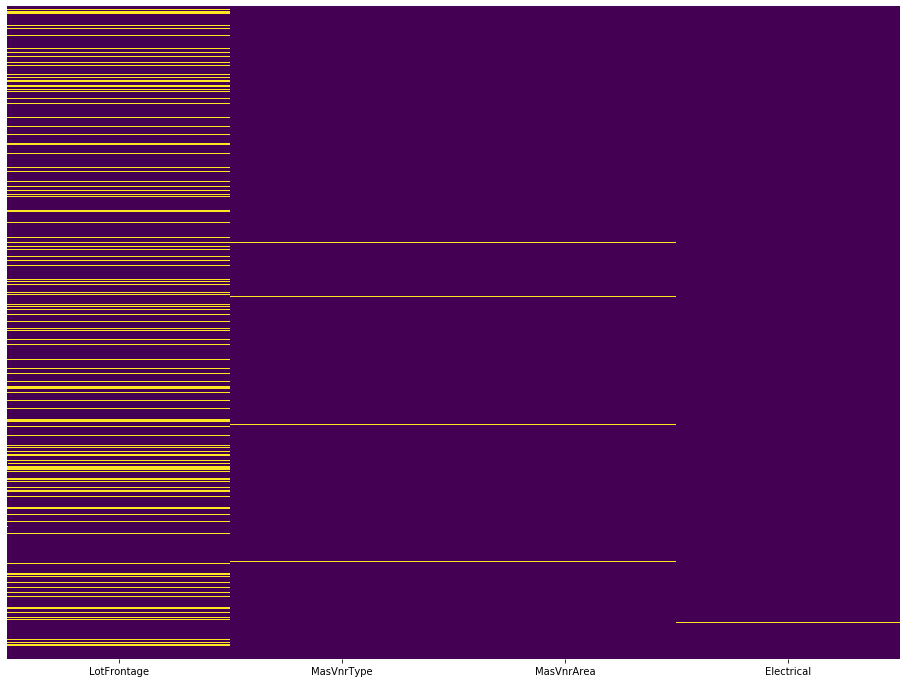

In [11]:
f, ax = plt.subplots(figsize=(16, 12))
col_missing_data = df_train.columns[df_train.isnull().sum() > 0].tolist()
sns.heatmap(df_train[col_missing_data].isnull(), cbar=False, yticklabels=False, cmap='viridis')

In [12]:
print(df_train['MasVnrType'].value_counts()) 
print(df_train['MasVnrArea'].value_counts())

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64


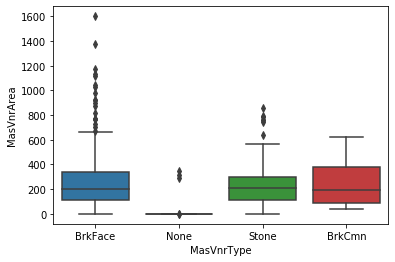

In [13]:
sns.boxplot(x=df_train['MasVnrType'], y=df_train['MasVnrArea'])

In [14]:
df_train['MasVnrType'] = df_train['MasVnrType'].apply(lambda x : 'None' if str(x) == 'nan' else x)
df_train['MasVnrArea'] = df_train['MasVnrArea'].apply(lambda x : '0' if str(x) == 'nan' else x)

In [15]:
print(df_train['Electrical'].value_counts()) 

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


In [16]:
df_train['Electrical'] = df_train['Electrical'].apply(lambda x : 'SBrkr' if str(x) == 'nan' else x)

In [17]:
print(df_train['LotFrontage'].value_counts()) 

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64


In [18]:
df_train['LotFrontage'] = df_train['LotFrontage'].apply(lambda x : df_train['LotFrontage'].mean() if str(x) == 'nan' else x)

## Encoding

In [19]:
categoricals = df_train.select_dtypes(exclude=np.number).columns.tolist()
categoricals

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [20]:
df_train['MasVnrArea'] = df_train['MasVnrArea'].astype('float32')
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].astype('int')

In [21]:
norminal = ['MSZoning', 'Street', 'Alley', 'LotShape',  'LandContour', 'Utilities',  
            'LotConfig',  'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
            'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
            'MasVnrType', 'Foundation',  'Heating', 'CentralAir', 'Electrical',
            'Functional',  'GarageType', 'PavedDrive', 'MiscFeature', 'SaleType', 
            'SaleCondition', 'GarageFinish']

In [22]:
Ordinal = ['LandSlope',  
           'PoolQC', 'KitchenQual','ExterQual', 'ExterCond', 'HeatingQC', 
           'BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond', 
          'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'Fence']

### Ordinal

In [23]:
for o in Ordinal:
    print(df_train[o].unique())

['Gtl' 'Mod' 'Sev']
['0' 'Ex' 'Fa' 'Gd']
['Gd' 'TA' 'Ex' 'Fa']
['Gd' 'TA' 'Ex' 'Fa']
['TA' 'Gd' 'Fa' 'Po' 'Ex']
['Ex' 'Gd' 'TA' 'Fa' 'Po']
['Gd' 'TA' 'Ex' '0' 'Fa']
['TA' 'Gd' '0' 'Fa' 'Po']
['0' 'TA' 'Gd' 'Fa' 'Ex' 'Po']
['TA' 'Fa' 'Gd' '0' 'Ex' 'Po']
['TA' 'Fa' '0' 'Gd' 'Po' 'Ex']
['No' 'Gd' 'Mn' 'Av' '0']
['Unf' 'BLQ' '0' 'ALQ' 'Rec' 'LwQ' 'GLQ']
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' '0' 'LwQ']
['0' 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']


In [24]:
df_train['LandSlope'].value_counts()

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

In [25]:
slope = lambda x: '0' if x=='Gtl' else '1' if x=='Mod' else '2'
df_train['LandSlope'] = df_train['LandSlope'].apply(slope)

In [26]:
df_train['LandSlope'].value_counts()

0    1382
1      65
2      13
Name: LandSlope, dtype: int64

In [29]:
egtfp = ['KitchenQual','ExterQual', 'ExterCond', 'HeatingQC', 'PoolQC']
for col in egtfp:
    print(df_train[col].value_counts())

TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64
TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64
0     1453
Gd       3
Fa       2
Ex       2
Name: PoolQC, dtype: int64


In [31]:
lvl = lambda x : '0' if x=='Po' or x=='0' else '1' if x=='Fa' else '2' if x=='TA' else '3' if x=='Gd' else '4'

for col in egtfp:
    df_train[col] = df_train[col].apply(lvl)

In [91]:
for col in egtfp:
    print(df_train[col].value_counts())

2    735
3    586
4    100
1     39
Name: KitchenQual, dtype: int64
2    906
3    488
4     52
1     14
Name: ExterQual, dtype: int64
2    1282
3     146
1      28
4       3
0       1
Name: ExterCond, dtype: int64
4    741
2    428
3    241
1     49
0      1
Name: HeatingQC, dtype: int64
0    1453
3       3
4       2
1       2
Name: PoolQC, dtype: int64


In [33]:
egtfpna = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
for col in egtfpna:
    print(df_train[col].value_counts())

TA    649
Gd    618
Ex    121
0      37
Fa     35
Name: BsmtQual, dtype: int64
TA    1311
Gd      65
Fa      45
0       37
Po       2
Name: BsmtCond, dtype: int64
0     690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64
TA    1311
0       81
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64
TA    1326
0       81
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64


In [34]:
lvl2 = lambda x : '0' if x=='0' else '1' if x=='Po' else '2' if x=='Fa' else '3' if x=='TA' else '4' if x=='Gd' else '5'

for col in egtfpna:
    df_train[col] = df_train[col].apply(lvl2)

In [35]:
for col in egtfpna:
    print(df_train[col].value_counts())

3    649
4    618
5    121
0     37
2     35
Name: BsmtQual, dtype: int64
3    1311
4      65
2      45
0      37
1       2
Name: BsmtCond, dtype: int64
0    690
4    380
3    313
2     33
5     24
1     20
Name: FireplaceQu, dtype: int64
3    1311
0      81
2      48
4      14
1       3
5       3
Name: GarageQual, dtype: int64
3    1326
0      81
2      35
4       9
1       7
5       2
Name: GarageCond, dtype: int64


In [41]:
print(df_train['BsmtExposure'].value_counts())

No    953
Av    221
Gd    134
Mn    114
0      38
Name: BsmtExposure, dtype: int64


In [44]:
df_train['BsmtExposure'] = df_train['BsmtExposure'].apply(lambda x : '0' if x=='0' else '1' if x=='No' else '2' if x=='Mn' else '3' if x=='Av' else '4')

In [45]:
print(df_train['BsmtExposure'].value_counts())

1    953
3    221
4    134
2    114
0     38
Name: BsmtExposure, dtype: int64


In [48]:
print(df_train['BsmtFinType1'].value_counts())
print(df_train['BsmtFinType2'].value_counts())

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
0       37
Name: BsmtFinType1, dtype: int64
Unf    1256
Rec      54
LwQ      46
0        38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64


In [49]:
## MAYBE THIS IS NOT ORDINAL
bsmt = lambda x : '0' if x=='0' else '1' if x=='Unf' else '2' if x=='LwQ' else '3' if x=='Rec' else '4' if x=='BLQ' else '5' if x=='ALQ' else '6'

df_train['BsmtFinType1'] = df_train['BsmtFinType1'].apply(bsmt)    
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].apply(bsmt)    

In [50]:
print(df_train['BsmtFinType1'].value_counts())
print(df_train['BsmtFinType2'].value_counts())

1    430
6    418
5    220
4    148
3    133
2     74
0     37
Name: BsmtFinType1, dtype: int64
1    1256
3      54
2      46
0      38
4      33
5      19
6      14
Name: BsmtFinType2, dtype: int64


In [47]:
print(df_train['Fence'].value_counts())

0        1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64


In [51]:
df_train['Fence'] = df_train['Fence'].apply(lambda x : '0' if x=='0' else '1' if x=='MnWw' else '2' if x=='GdWo' else '3' if x=='MnPrv' else '4')

In [95]:
print(df_train['Fence'].value_counts())

0    1179
3     157
4      59
2      54
1      11
Name: Fence, dtype: int64


In [115]:
for col in Ordinal:
    df_train[col] = df_train[col].astype(float) 

### Norminal

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [54]:
df_train[norminal].head()

,MSZoning,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Functional,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition,LotShape,LandContour,Utilities,GarageFinish
0,RL,Pave,0,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,Typ,Attchd,Y,0,WD,Normal,Reg,Lvl,AllPub,RFn
1,RL,Pave,0,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,Typ,Attchd,Y,0,WD,Normal,Reg,Lvl,AllPub,RFn
2,RL,Pave,0,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,Typ,Attchd,Y,0,WD,Normal,IR1,Lvl,AllPub,RFn
3,RL,Pave,0,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,Typ,Detchd,Y,0,WD,Abnorml,IR1,Lvl,AllPub,Unf
4,RL,Pave,0,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,Typ,Attchd,Y,0,WD,Normal,IR1,Lvl,AllPub,RFn


In [55]:
for col in norminal:
    le = LabelEncoder()
    le.fit(df_train[col].unique().astype('str'))
    df_train.loc[:,col] = le.transform(df_train.loc[:,col].astype('str'))

df_train[norminal].head()

# for categorical in categoricals:
#     df_train.loc[:,categorical] = label_encoder.fit_transform(df_train.loc[:,categorical].astype('str')).astype('float64')
# df_train[categoricals].head()

,MSZoning,Street,Alley,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,Functional,GarageType,PavedDrive,MiscFeature,SaleType,SaleCondition,LotShape,LandContour,Utilities,GarageFinish
0,3,1,0,4,5,2,2,0,5,1,...,6,2,2,0,8,4,3,3,0,2
1,3,1,0,2,24,1,2,0,2,1,...,6,2,2,0,8,4,3,3,0,2
2,3,1,0,4,5,2,2,0,5,1,...,6,2,2,0,8,4,0,3,0,2
3,3,1,0,0,6,2,2,0,5,1,...,6,6,2,0,8,0,0,3,0,3
4,3,1,0,2,15,2,2,0,5,1,...,6,2,2,0,8,4,0,3,0,2


## Correlation visualization

In [117]:
df_train.corr()['SalePrice'].sort_values(ascending = False).tolist()

[1.0,
 0.7909816005838047,
 0.7086244776126511,
 0.6826392416562591,
 0.6595997207286572,
 0.640409197258349,
 0.6234314389183598,
 0.6135805515591944,
 0.6058521846919166,
 0.5852071991725148,
 0.5606637627484452,
 0.5337231555820238,
 0.5228973328794967,
 0.5204376059504007,
 0.5071009671113867,
 0.47261449900457725,
 0.4669288367515242,
 0.4276487073988049,
 0.38641980624215627,
 0.38247899119010337,
 0.3746962210008844,
 0.33490085154055077,
 0.32441344456813076,
 0.31933380283206614,
 0.31585622711605577,
 0.3049078730706334,
 0.2841076755947784,
 0.27383907400622587,
 0.2638433538714063,
 0.26319078447040084,
 0.2613664351029631,
 0.2513281638401573,
 0.23494494099321578,
 0.23135695225722583,
 0.22712223313149718,
 0.22240529240713802,
 0.214479105546969,
 0.21309202967780272,
 0.2126071564855757,
 0.21085146582230405,
 0.18016262334399255,
 0.1682131543007415,
 0.1323831119277861,
 0.1154843047305474,
 0.1153279170832784,
 0.11144657114291048,
 0.10376553702965864,
 0.103551011

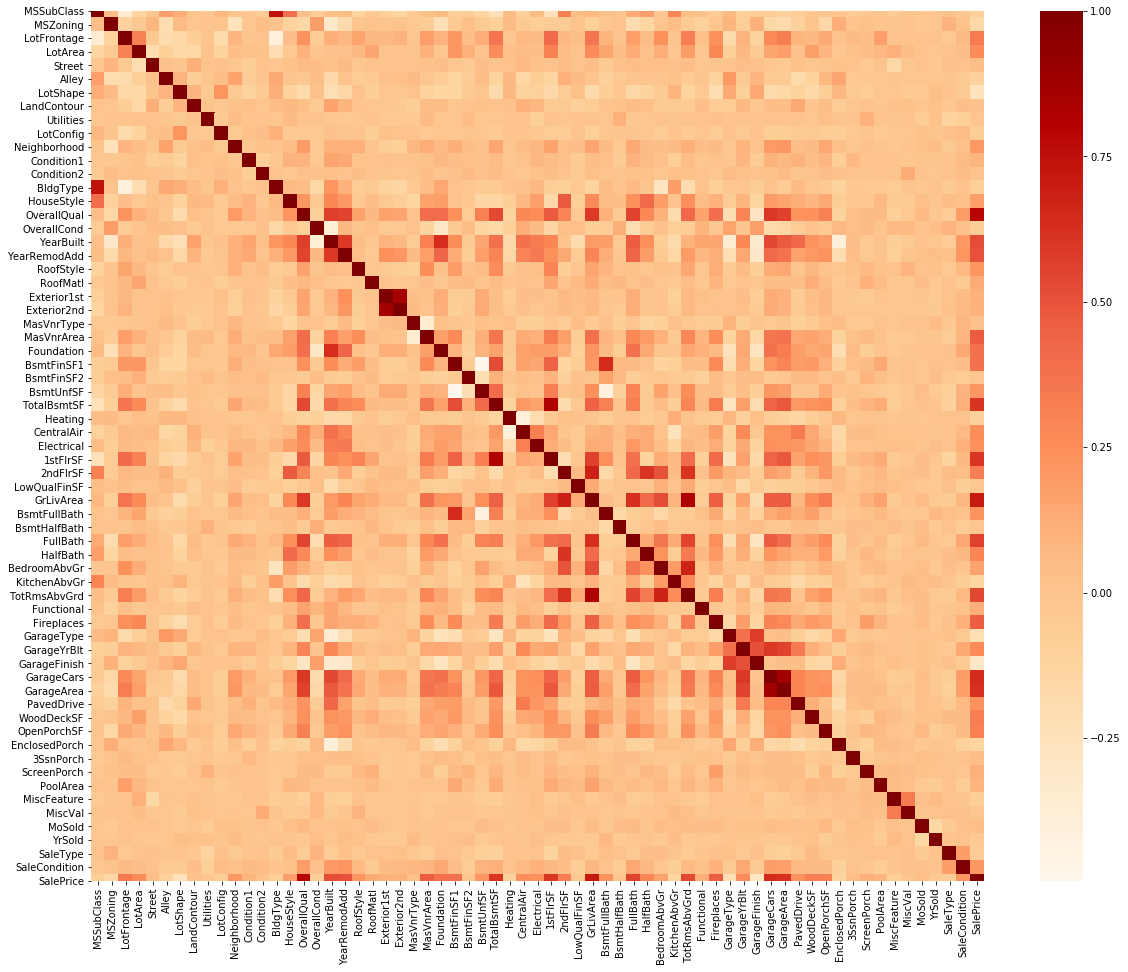

In [100]:
f, ax = plt.subplots(figsize=(20, 16))
sns.heatmap(df_train.corr(), cmap = 'OrRd');

In [167]:
high_corr = df_train.corr()['SalePrice'][abs(df_train.corr()['SalePrice']) > 0.5].sort_values(ascending = False)
high_corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

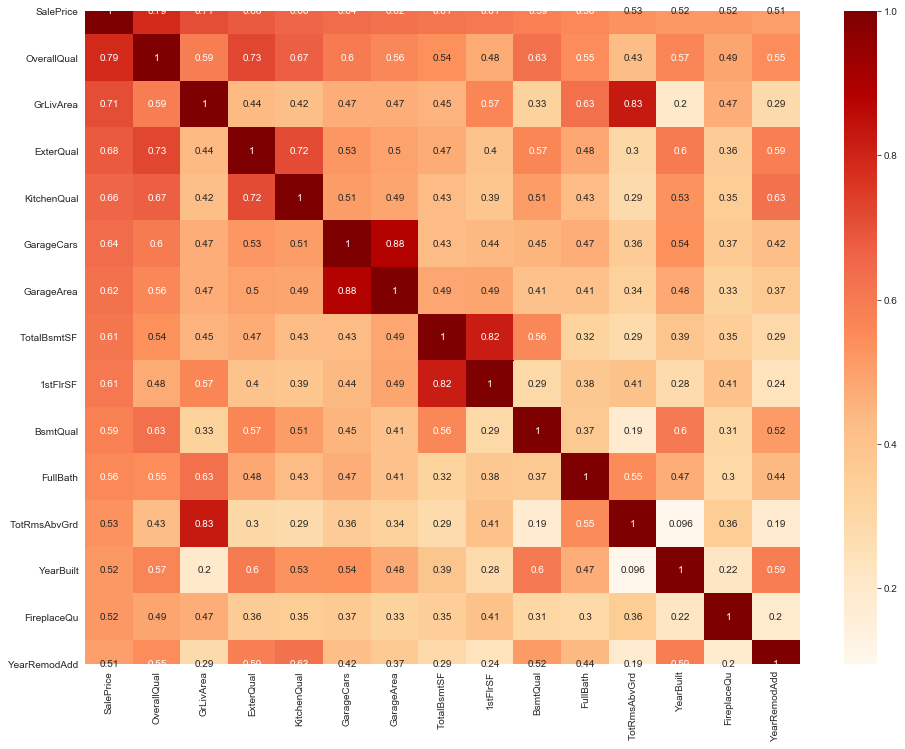

In [168]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[high_corr.index].corr(), cbar=True, annot=True, cmap = 'OrRd');

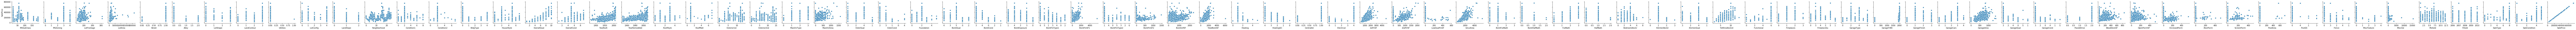

In [77]:
pp = sns.pairplot(data=df_train,
                  y_vars=['SalePrice'],
                  x_vars=df_train.columns.tolist())

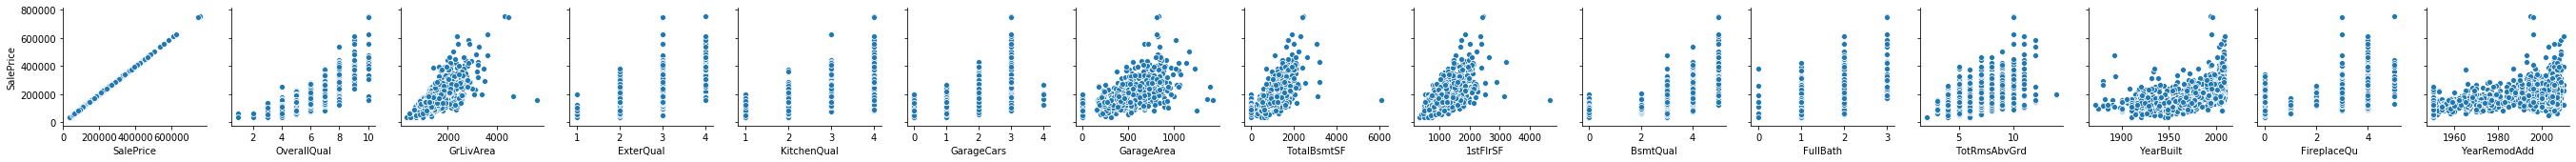

In [132]:
pp = sns.pairplot(data=df_train,
                  y_vars=['SalePrice'],
                  x_vars=high_corr.index.tolist())

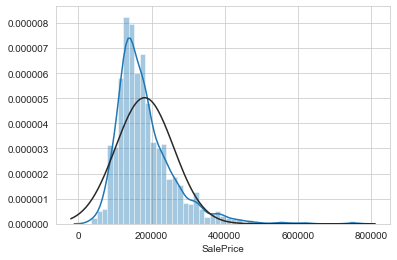

In [133]:
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

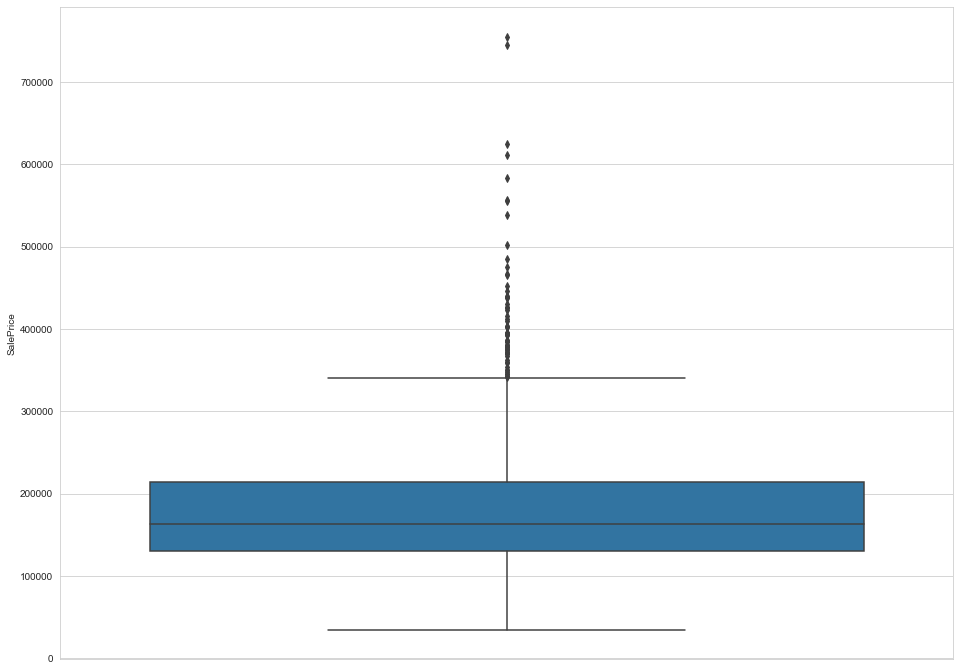

In [169]:
f, ax = plt.subplots(figsize=(16, 12))
sns.boxplot(y=df_train["SalePrice"])

In [170]:
df_train["SalePrice"] = df_train["SalePrice"].apply(np.log)

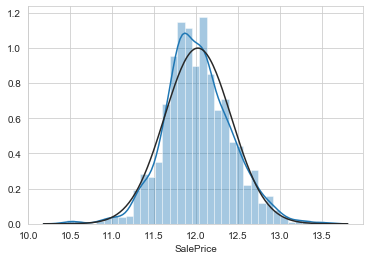

In [171]:
sns.set_style('whitegrid')
sns.distplot(df_train["SalePrice"],fit=norm)

In [173]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [174]:
X = df_train.iloc[:,0:79]  #independent columns
y = df_train.iloc[:,-1] 
y

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

In [164]:
X = df_train.iloc[:,0:79]  #independent columns
y = df_train.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

           Specs         Score
3        LotArea  1.011497e+07
74       MiscVal  6.253332e+06
43      2ndFlrSF  4.648841e+05
33    BsmtFinSF1  3.999851e+05
70      PoolArea  3.835642e+05
35    BsmtFinSF2  3.688827e+05
25    MasVnrArea  2.880241e+05
36     BsmtUnfSF  2.747512e+05
44  LowQualFinSF  2.448810e+05
45     GrLivArea  1.968501e+05


In [172]:
X = df_train.iloc[:,0:79]  #independent columns
y = df_train.iloc[:,-1]    #target column i.e price range

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

ValueError: Unknown label type: (array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345]),)

In [161]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

[1.51297407e-02 7.69865876e-03 2.42255940e-02 2.90513473e-02
 4.87523596e-04 4.09898932e-03 1.43994773e-02 6.15517064e-03
 7.55825172e-05 1.63785403e-02 3.89485629e-03 2.17762581e-02
 8.68579454e-03 1.11701459e-03 5.92178395e-03 1.22344752e-02
 2.17587838e-02 1.54604630e-02 2.62654417e-02 2.48594355e-02
 1.02579061e-02 1.44479298e-03 1.96720446e-02 1.95547954e-02
 1.38149467e-02 1.89055198e-02 6.96087041e-03 7.27087041e-03
 1.15660394e-02 1.12999553e-02 8.04830429e-03 1.65286585e-02
 1.98519774e-02 2.63161239e-02 8.15377967e-03 6.20165112e-03
 2.81965595e-02 2.80742188e-02 1.69246714e-03 1.72759715e-02
 2.41228107e-03 5.24568829e-03 2.74243362e-02 1.62056337e-02
 5.25722608e-04 2.79760283e-02 1.44493479e-02 4.03541411e-03
 9.82077354e-03 1.20707189e-02 1.66393921e-02 1.78089034e-03
 1.34155544e-02 2.44518667e-02 4.78136254e-03 1.03418295e-02
 1.54837313e-02 1.24011382e-02 2.42852223e-02 1.51114156e-02
 1.07318238e-02 2.64872398e-02 4.11434670e-03 2.91469217e-03
 5.43132953e-03 2.063599

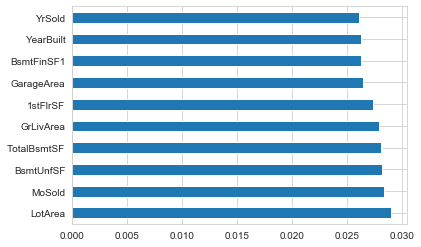

In [165]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
           Specs         Score
3        LotArea  1.011497e+07
74       MiscVal  6.253332e+06
43      2ndFlrSF  4.648841e+05
33    BsmtFinSF1  3.999851e+05
70      PoolArea  3.835642e+05
35    BsmtFinSF2  3.688827e+05
25    MasVnrArea  2.880241e+05
36     BsmtUnfSF  2.747512e+05
44  LowQualFinSF  2.448810e+05
45     GrLivArea  1.968501e+05

In [ ]:
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
BsmtQual        0.585207
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
FireplaceQu     0.520438
YearRemodAdd    0.507101

# Visualizations

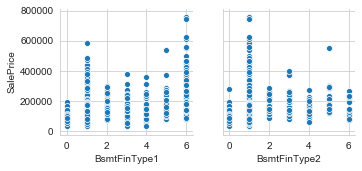

In [142]:
sns.pairplot(data=df_train,
                  y_vars=['SalePrice'],
                  x_vars=['BsmtFinType1','BsmtFinType2'])

In [ ]:
# Strong Correlation values between predictor variable!
# GarageCars & GarageArea. Increase In Area of Garage -> Increase in number Cars
# TotRmsAbvGrd & GrLivArea. Total rooms above grade (does not include bathrooms) & Above grade (ground) living area square feet
# 1stFlrSF & TotalBsmtSF. First Floor square feet & Total square feet of basement area

In [ ]:
# REMOVE FEATURE
# 1) Garage Area - People dont think about how many Msq when viewing the garage. They estimate how many cars can fit into the garage

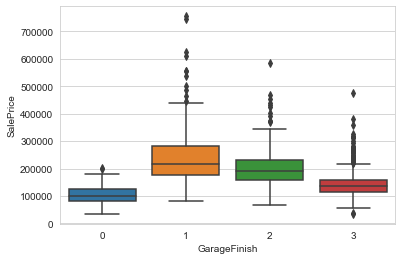

In [147]:
sns.boxplot(y = df_train['SalePrice'], x = df_train['GarageFinish'])

In [ ]:
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(df_train[corr.index].isnull(), cmap = 'Greys');

In [ ]:
df_train['SalePrice'].describe()

In [ ]:
sns.set(style="whitegrid",)
plt.figure(figsize=(16, 6))
ax = sns.boxplot(y=df_train["SalePrice"])

In [ ]:
sns.distplot(df_train["SalePrice"],fit=norm)

In [ ]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())
# Positive skew https://becominghuman.ai/how-to-deal-with-skewed-dataset-in-machine-learning-afd2928011cc


In [ ]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

In [ ]:
sns.distplot(df_train["SalePrice"],fit=norm)

In [ ]:
sns.pairplot(data = df_train[cor.index])

# Data Pre-Processing

In [ ]:
# shuffle here
# k-fold cross validation

X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values
X_valid =
y_valid =

In [ ]:
X_train

# Prediction

## XGBoost

In [ ]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(X_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, y_valid)))

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train)

In [ ]:
my_model = XGBRegressor(n_estimators=500)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)],
             verbose=False)

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

In [ ]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
my_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)

## RandomForestRegressor

## 3-layer Feedforward Neural Network

# Ridge/lasso regression